In [2]:
from __future__ import division
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import grid_search
from sklearn import neighbors
from sklearn import linear_model

<div class = "alert alert-success" style = "border-radius:10px"><b><font size = 5>Importing the data</b></font><br><br>Modifying the target variable (Churn?) using one-hot encoding, so that this categorial variable is encoded into a dummy variable.<br>Then, dropping three columns : (Phone) because it is reasonable to assume it is irrelevant; (Churn?) because it is our target variable; finally, we decided to drop (State), because we suppose that it duplicates the (Area Code) feature.<br>We also use one-hot encoding on the two other categorical variables (Int'l Plan) and (VMail Plan) <br> 
We are going to decide on the accuracy score, validation method and model first -- and then we will play with the other features</div>

In [3]:
df = pd.DataFrame.from_csv('./files/churn.csv')
y = np.where(df['Churn?'] == 'True.',1,0)
df.reset_index(inplace=True)

columns_to_drop = ['State', 'Churn?', 'Phone']
df.drop(columns_to_drop, inplace=True, axis = 1)

yes_no_cols = ["Int'l Plan","VMail Plan"]
df[yes_no_cols] = df[yes_no_cols] == 'yes'
df["Int'l Plan"] = np.where(df["Int'l Plan"] == True,1,0)
df["VMail Plan"]=  np.where(df["VMail Plan"]== True,1,0)

features = df.columns
X = df.as_matrix().astype(np.float)

In [4]:
df

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


<div class = "alert alert-success" style = "border-radius:10px"><font size = 5><b>1. K-Neighbors Classification</b></font><br><br>1.1. Using Train/Test/Validation split<br><br> </div>

In [5]:
indexes = np.random.permutation(range(0,len(y)))
X_val = [X[x] for x in (indexes[0:len(y)*0.1])]
y_val = [y[x] for x in (indexes[0:len(y)*0.1])]

X_without_val = [X[x] for x in (indexes[len(y)*0.1:])]
y_without_val = [y[x] for x in (indexes[len(y)*0.1:])]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_without_val, y_without_val, train_size=0.7, random_state=42)

<div class = "alert alert-success" style = "border-radius:10px">1.1.1. Exploring the effect of scaling and of changing the number of neighbours</div>

In [7]:
accuracy = []
for x in range(1, 100):    
    clf = neighbors.KNeighborsClassifier(n_neighbors = x)
    clf.fit(X_train,y_train)
    yhat = clf.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,yhat))

In [8]:
accuracy_scale = []
for x in range(1, 100):    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = neighbors.KNeighborsClassifier(n_neighbors = x)
    clf.fit(X_train_scaled,y_train)
    yhat = clf.predict(X_test_scaled)

    accuracy_scale.append(metrics.accuracy_score(y_test,yhat))

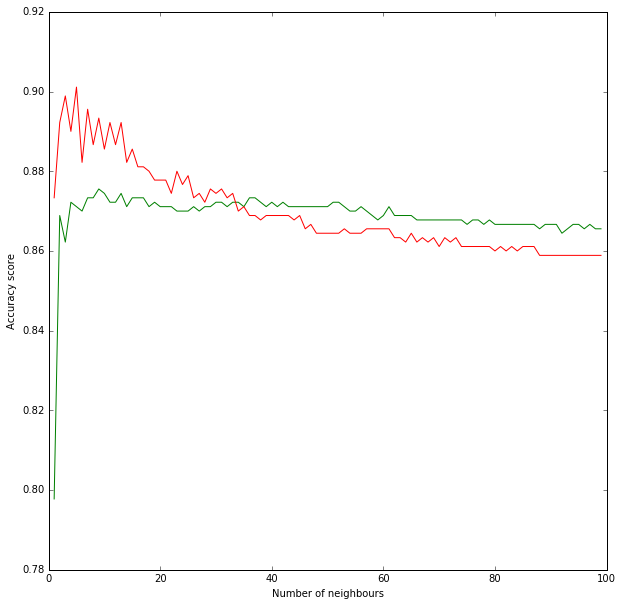

In [267]:
plt.figure(figsize=[10,10])
plt.plot(range(1, 100), accuracy, color='green')
plt.plot(range(1, 100), accuracy_scale, color='red')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy score')
plt.legend();

<div class = "alert alert-info">Based on the graph above, we decided that 3 neighbours in combination with scaled data is the best option.<br>
Let us notice that odd values give better accuracies, which is reasonable given that we are using k-neighbors algorithm.</div>

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train_scaled,y_train)
yhat = clf.predict(X_test_scaled)
yhat_val = clf.predict(X_val_scaled)

print 'The model accuracy on the test set is %.4f' % metrics.accuracy_score(y_test,yhat)
print 'The model accuracy on the validation set is %.4f' % metrics.accuracy_score(y_val,yhat_val)

print metrics.classification_report(y_val,yhat_val)

The model accuracy on the test set is 0.9000
The model accuracy on the validation set is 0.8829
             precision    recall  f1-score   support

          0       0.90      0.97      0.93       287
          1       0.65      0.33      0.43        46

avg / total       0.87      0.88      0.87       333



In [13]:
(0.9*287+0.65*46)/333   # weighted presicion

0.8654654654654654

In [15]:
(0.97*287+46*0.33)/333

0.8815915915915916

<div class = "alert alert-success" style = "border-radius:10px">1.1.2. Plotting the ROC curve and calculating the area under it to assess "goodness" of the method.</div>

The area under the curve is 0.81


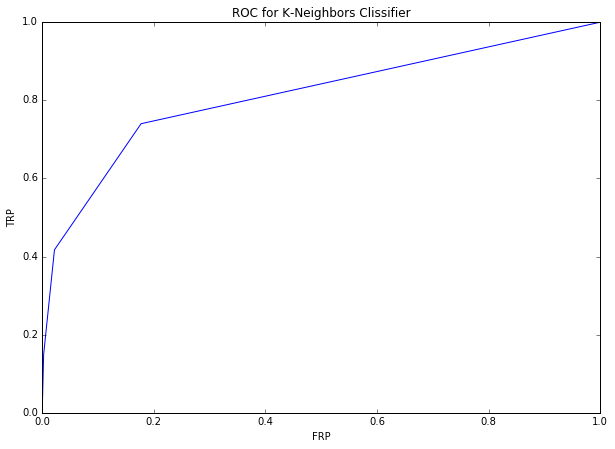

In [269]:
score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,score[:,1])

plt.figure(figsize=[10,7])
plt.title('ROC for K-Neighbors Clissifier')
plt.plot(fpr,tpr)
fig.hold('on')
plt.xlabel('FRP')
plt.ylabel('TRP')

print "The area under the curve is %.2f" % metrics.auc(fpr,tpr);

<div class = "alert alert-info">Although the accuracy score is quite high, and the area under the ROC is close to 1.0, according to the recall metrics, the False Negatives constitute 57% of all actual positives, and according to the precision metrics, the False Positives consitute 20% of all predicted positives. In our problem we are very conserned about the False Negatives, so this model wouldn't work well for us.
</div>

<div class = "alert alert-success" style = "border-radius:10px">1.2. Using cross validation</div>

In [276]:
cv = cross_validation.KFold(X.shape[0], n_folds = 50, random_state=42)
yhat = np.zeros((X.shape[0],1))
for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    
    clf = neighbors.KNeighborsClassifier(n_neighbors = 3)
    clf.fit(X_train_scaled,y_train)
    
    X_test_scaled = scaler.transform(X_test)
    yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)

print metrics.classification_report(y,yhat)
print metrics.accuracy_score(y,yhat)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      2850
          1       0.77      0.40      0.53       483

avg / total       0.89      0.90      0.88      3333

0.896489648965


<div class = "alert alert-info">We tried to use K-fold classification, but it did not help. The accuracy does not improve and, worse still, the number of False Negatives is still high. As we want to minimize them, we hypothesize that a good solution might be adding different weights to our two classes, as we are dealing with an unbalanced dataset.
</div>

<div class = "alert alert-success" style = "border-radius:10px"><font size = 5><b>2. Logistic regression</b></font><br><br>We try logisitc regression because k-neighbors does not allow to assign different weights to the two classes. We also decided to only use K-fold cross-validation, since it performed about the same in the previous experiment, but this way we don't loose data.</div>

In [285]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,random_state=42)
parameters = {'class_weight' : [{1:0.01},{1:0.1},{1:1},{1:10},{1:100}]}

for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    lr = linear_model.LogisticRegression()
    lr = grid_search.GridSearchCV(lr, parameters)
    lr.fit(X_train,y_train)
    yhat = lr.predict(X_test_scaled)

print metrics.classification_report(yhat,y_test)
print str(lr.best_params_)
print metrics.accuracy_score(yhat,y_test)

             precision    recall  f1-score   support

          0       0.95      0.87      0.91       310
          1       0.17      0.35      0.23        23

avg / total       0.89      0.84      0.86       333

{'class_weight': {1: 1}}
0.837837837838


<div class = "alert alert-success" style = "border-radius:10px">Plotting the ROC curve and calculating the area under it to assess "goodness" of the method.</div>

The area under the curve is 0.94


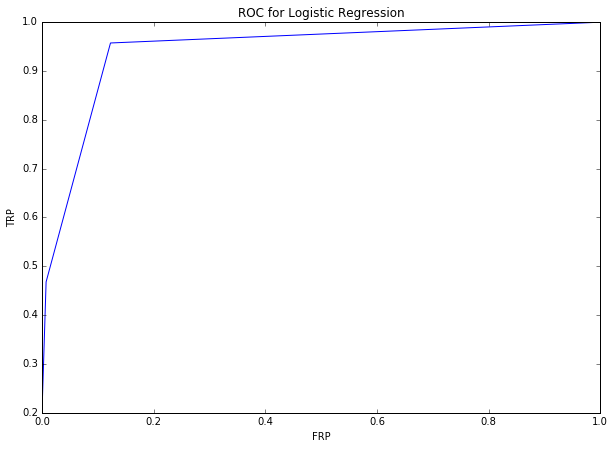

In [287]:
score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,score[:,1])

plt.figure(figsize=[10,7])
plt.title('ROC for Logistic Regression')
plt.plot(fpr,tpr)
fig.hold('on')
plt.xlabel('FRP')
plt.ylabel('TRP')

print "The area under the curve is %.2f" % metrics.auc(fpr,tpr);

<div class = "alert alert-info">The result is worse, even assigning different weights to the two classes. In fact, the best result is obtained by keeping the same weights. Therefore, we look for another classifier which might allow to account for the fact that the data set is unbalanced.<br> Moreover, we observe that ROC curves (both for K-neighbors and logisitc regression) do not have the expected smooth shape. This is another reason to look for a better algorithm.
</div>

<div class = "alert alert-success" style = "border-radius:10px"><font size = 5><b>3. Random Forest Classifier</b></font><br><br>
Now we move to random forest classifier, with both K-fold cross validation and grid  search on weights. </div>

In [292]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,random_state=42)
yhat = np.zeros((X.shape[0],1))

parameters = {'class_weight' : [{1:0.01},{1:0.1},{1:1},{1:2},{1:3},{1:5},{1:10},{1:100}],"n_estimators":[1,10,20]}

i=0
acc = np.zeros((10,))

for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    
    clf = RandomForestClassifier()
    clf = grid_search.GridSearchCV(clf, parameters, scoring='f1')
    
    clf.fit(X_train_scaled,y_train)
    
    X_test_scaled = scaler.transform(X_test)
    
    yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)
    acc[i] = metrics.accuracy_score(yhat[test_idx], y_test)
    i+=1
    
    print str(clf.best_params_)
    
print '\nAccuracy score: ' + str(metrics.accuracy_score(yhat,y))
print metrics.classification_report(yhat,y)

{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 0.1}}
{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 0.1}}
{'n_estimators': 20, 'class_weight': {1: 0.1}}
{'n_estimators': 20, 'class_weight': {1: 0.1}}
{'n_estimators': 20, 'class_weight': {1: 2}}
{'n_estimators': 20, 'class_weight': {1: 1}}
{'n_estimators': 20, 'class_weight': {1: 0.1}}
{'n_estimators': 20, 'class_weight': {1: 0.1}}

Accuracy score: 0.948694869487
             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97      2961
        1.0       0.71      0.92      0.80       372

avg / total       0.96      0.95      0.95      3333



The area under the curve is 0.98


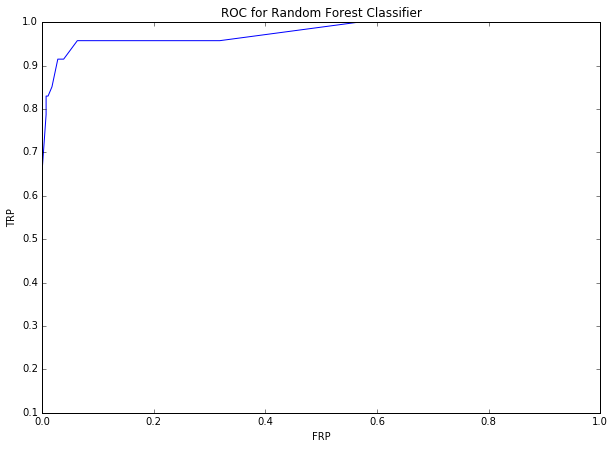

In [294]:
score = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = metrics.roc_curve(y_test,score[:,1])

plt.figure(figsize=[10,7])
plt.title('ROC for Random Forest Classifier')
plt.plot(fpr,tpr)
fig.hold('on')
plt.xlabel('FRP')
plt.ylabel('TRP')

print "The area under the curve is %.2f" % metrics.auc(fpr,tpr);

<div class = "alert alert-info">
The result is much better and we also notice that it is improved by assigning different weights to the two classes which was expected.  Also, the number of false negatives is strongly reduced. Bases on this result, we will use the <b>random forest classifier with K-fold cross validation assigning weights 1:0.1</b>. </div>

<div class = "alert alert-success" style = "border-radius:10px"><font size = 5><b>Playing with features</b></font></div>

In [318]:
df = pd.DataFrame.from_csv('./files/churn.csv')
y = np.where(df['Churn?'] == 'True.',1,0)
df.reset_index(inplace=True)

col_list = ['Day Mins', 'Eve Mins', 'Night Mins']
df['Total_Mins'] = df[col_list].sum(axis=1)

col_list = ['Day Calls', 'Eve Calls', 'Night Calls']
df['Total_Calls'] = df[col_list].sum(axis=1)

col_list = ['Day Charge', 'Eve Charge', 'Night Charge']
df['Total_Charge'] = df[col_list].sum(axis=1)

columns_to_drop = ['State', 'Churn?', 'Phone','Day Charge', 'Eve Charge', 'Night Charge','Day Calls', 'Eve Calls', 'Night Calls', 'Day Mins', 'Eve Mins', 'Night Mins']
df.drop(columns_to_drop, inplace=True, axis = 1)

yes_no_cols = ["Int'l Plan","VMail Plan"]
df[yes_no_cols] = df[yes_no_cols] == 'yes'
df["Int'l Plan"] = np.where(df["Int'l Plan"] == True,1,0)
df["VMail Plan"]=  np.where(df["VMail Plan"]== True,1,0)

features = df.columns
X = df.as_matrix().astype(np.float)

In [319]:
df

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Total_Mins,Total_Calls,Total_Charge
0,128,415,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,107,415,0,1,26,13.7,3,3.70,1,611.5,329,55.54
2,137,415,0,0,0,12.2,5,3.29,0,527.2,328,59.00
3,84,408,1,0,0,6.6,7,1.78,2,558.2,248,65.02
4,75,415,1,0,0,10.1,3,2.73,3,501.9,356,49.36
5,118,510,1,0,0,6.3,6,1.70,0,647.9,317,65.91
6,121,510,0,1,24,7.5,7,2.03,3,779.3,314,76.28
7,147,415,1,0,0,7.1,6,1.92,0,471.9,269,44.98
8,117,408,0,0,0,8.7,4,2.35,1,751.9,267,70.97
9,141,415,1,1,37,11.2,5,3.02,0,807.0,292,77.52


In [320]:
cv = cross_validation.KFold(X.shape[0],n_folds = 10,random_state=42)
yhat = np.zeros((X.shape[0],1))

acc = np.zeros((10,))

for train_idx, test_idx in cv:
    X_train,y_train = X[train_idx,:],y[train_idx]
    X_test,y_test = X[test_idx,:],y[test_idx]
    
    scaler = StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = RandomForestClassifier(class_weight = {1:0.1})
    
    clf.fit(X_train_scaled,y_train)
    yhat[test_idx] = clf.predict(X_test_scaled).reshape(-1,1)    
    
print '\nAccuracy score: ' + str(metrics.accuracy_score(yhat,y))
print '\n' + metrics.classification_report(yhat,y)


Accuracy score: 0.971197119712

             precision    recall  f1-score   support

        0.0       1.00      0.97      0.98      2932
        1.0       0.82      0.98      0.89       401

avg / total       0.98      0.97      0.97      3333



<div class = "alert alert-info">FINAL COMMENTS!
</div>